<a href="https://colab.research.google.com/github/Wiradhika6051/Feminicare/blob/ML/forecasting_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Baca dataset
df = pd.read_excel('dataset_v4.xlsx')

In [ ]:
df.head()

,ClientID,LengthofCycle,EstimatedDayofOvulation,LengthofMenses,Age,BMI,CycleNumber,LengthofCycle1,LengthofCycle2,LengthofCycle3
0,nfp8020,28,14.0,5.0,33,25.790533,4,27,31,27
1,nfp8024,26,15.0,5.0,23,24.958580,4,29,30,28
2,nfp8026,27,16.0,6.0,39,21.454890,4,26,30,25
3,nfp8030,25,12.0,6.0,23,22.462722,4,26,29,29
4,nfp8031,27,13.0,6.0,30,21.948577,4,28,27,27


In [ ]:
# Drop kolom 'EstimatedDayofOvulation'
df = df.drop(['ClientID','EstimatedDayofOvulation', 'CycleNumber'], axis=1)

# Pisahkan variabel target (y) dan fitur (X)
y = df['LengthofCycle']
X = df.drop(['LengthofCycle'], axis=1)

X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.head()

,LengthofMenses,Age,BMI,LengthofCycle1,LengthofCycle2,LengthofCycle3
22,5.0,31.0,25.845589,25.0,27.0,25.0
15,6.0,21.0,38.966995,34.0,32.0,32.0
65,5.0,35.0,29.856520,28.0,30.0,27.0
11,5.0,32.0,24.102858,29.0,27.0,31.0
42,4.0,26.0,28.000000,25.0,27.0,28.0


In [ ]:
print(df.isnull().sum())
print(np.any(np.isnan(X_train)), np.any(np.isnan(y_train)))


LengthofCycle     0
LengthofMenses    0
Age               0
BMI               0
LengthofCycle1    0
LengthofCycle2    0
LengthofCycle3    0
dtype: int64
False False


In [ ]:
n_features = X_train.shape[1]

import numpy as np

# Assuming X_train, y_train are your training sets
# Reshape the data for LSTM input

n_features = X_train.shape[1]  # The number of features



# model LSTM with 4 layers
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

# Display the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                70        
                                                                 
 dense_7 (Dense)             (None, 8)                 88        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 167 (668.00 Byte)
Trainable params: 167 (668.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = tf.keras.losses.mean_absolute_error,
               optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics=["mae"])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
4/4 [==============================] - 1s 72ms/step - loss: 48.1117 - mae: 48.1117 - val_loss: 48.9686 - val_mae: 48.9686
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 47.7080 - mae: 47.7080 - val_loss: 48.6497 - val_mae: 48.6497
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 47.4145 - mae: 47.4145 - val_loss: 48.3783 - val_mae: 48.3783
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 47.1569 - mae: 47.1569 - val_loss: 48.1279 - val_mae: 48.1279
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 46.9160 - mae: 46.9160 - val_loss: 47.8891 - val_mae: 47.8891
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 46.6854 - mae: 46.6854 - val_loss: 47.6581 - val_mae: 47.6581
Epoch 7/100
4/4 [==============================] - 0s 19ms/step - loss: 46.4612 - mae: 46.4612 - val_loss: 47.4317 - val_mae: 47.4317
Epoch 8/100
4/4 [==============================] - 0s 24ms/ste

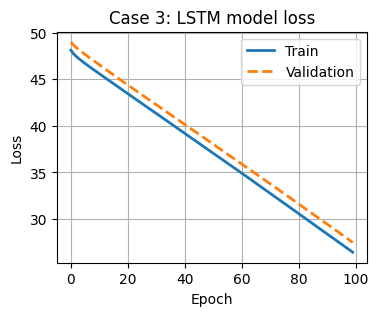

In [ ]:
# plot the loss and val loss
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'], '-', linewidth=2)
plt.plot(history.history['val_loss'], '--', linewidth=2)
plt.grid(True)
plt.legend(['Train', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Case 3: LSTM model loss')
# # save figure
# fig = plt.gcf()
# fig.savefig('case3_loss_lstm.eps', dpi=300, bbox_inches='tight')


In [ ]:
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
testPredict = np.round(testPredict)

1/1 [==============================] - 0s 30ms/step


In [ ]:
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(y_test, testPredict))
print('Test Score: %.2f RMSE' % np.sqrt(testScore))

# calculate mean absolute error
testScore = mean_absolute_error(y_test, testPredict)
print('Test Score: %.2f MAE' % (testScore))

# calculate r2 score
testScore = r2_score(y_test, testPredict)
print('Test Score: %.2f R2' % (testScore))




Test Score: 5.30 RMSE
Test Score: 27.50 MAE
Test Score: -55.49 R2


In [ ]:
# plot baseline and predictions
plt.figure(figsize=(4, 3))
plt.plot(y_test[:,:,0].reshape(-1,1), '-->', linewidth=2.0)
plt.plot(np.arange(15, 16),testPredict[0,0], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Days')
plt.xlabel('Cycle number')
plt.legend(['Cycle duration', 'Prediction (LSTM)'])
plt.title('Case 3: Predict the next cycle duration')
plt.grid(True)

# save figure
fig = plt.gcf()
fig.savefig('case3_prediction_lstm.eps', dpi=300, bbox_inches='tight')

73     27.0
18     29.0
117    33.0
78     31.0
76     28.0
Name: LengthofCycle, dtype: float32


KeyError: ignored

<Figure size 400x300 with 0 Axes>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


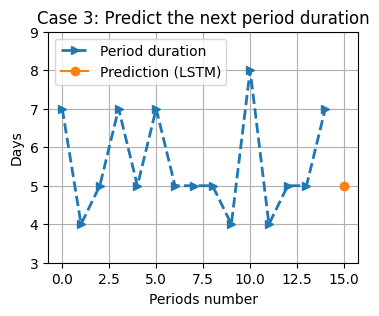

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(input_test_irregular_cycle[:,:,1].reshape(-1,1), '-->', linewidth=2.0)
#plt.plot(np.arange(5),output_test_irregular_cycle[:,1], '-->', linewidth=2.0)
plt.plot(np.arange(15, 16),testPredict[0,1], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
#set the y axis range
plt.ylim(3, 9)
plt.ylabel('Days')
plt.xlabel('Periods number')
plt.legend(['Period duration', 'Prediction (LSTM)'])
plt.title('Case 3: Predict the next period duration')
plt.grid(True)

# save figure
fig = plt.gcf()
fig.savefig('case3_prediction_lstm_period.eps', dpi=300, bbox_inches='tight')

In [ ]:
model.save('case3_lstm.h5')

: 